# Import moudles that be used later

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder

# Read data

In [5]:
bank=pd.read_csv("D:/ammar college/Level 3/semester2/Advanced ML/bank.csv")

In [6]:
bank.shape

(11162, 17)

In [7]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [8]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [9]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# check for null values

In [10]:

pd.isnull(bank).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Heatmap to see the the correlation between featuers and target

<Axes: >

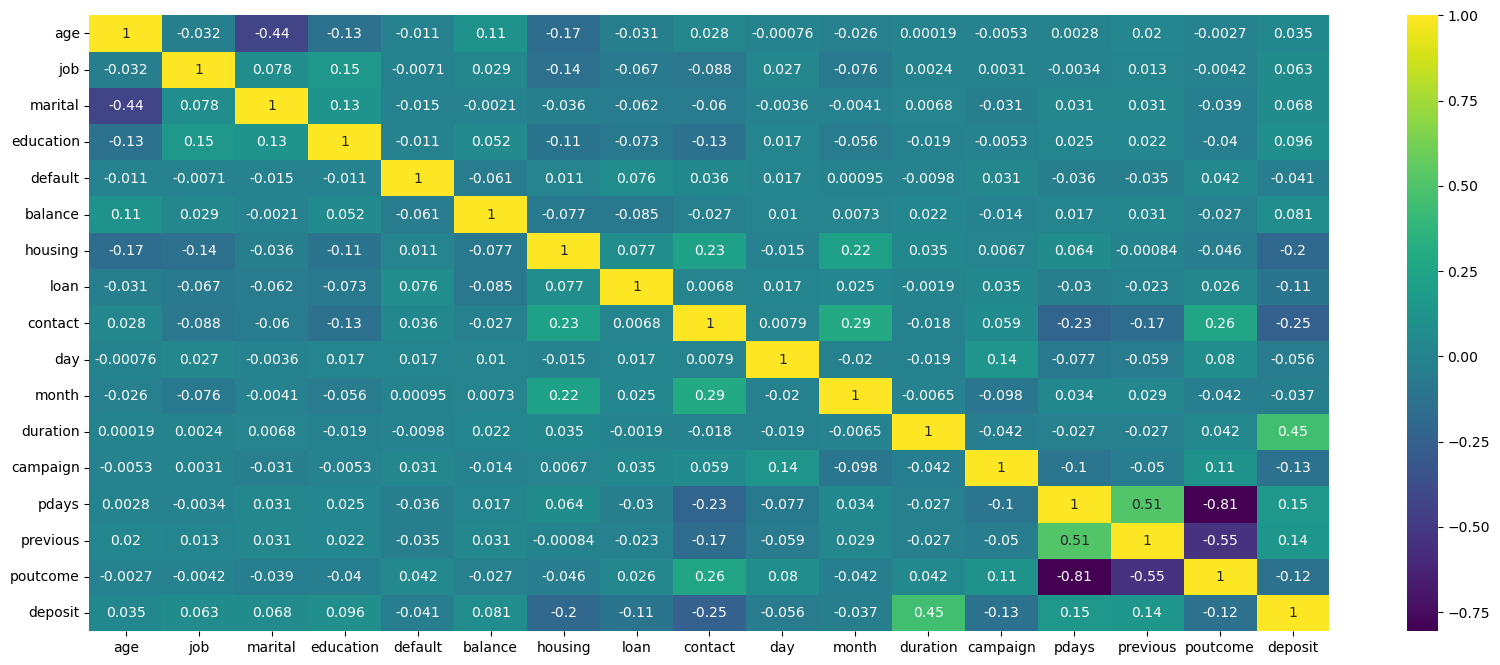

In [41]:
plt.figure(figsize=(20,8))
sns.heatmap(bank.corr(),annot=True,cmap="viridis")

0    5873
1    5289
Name: deposit, dtype: int64


<Axes: xlabel='deposit', ylabel='count'>

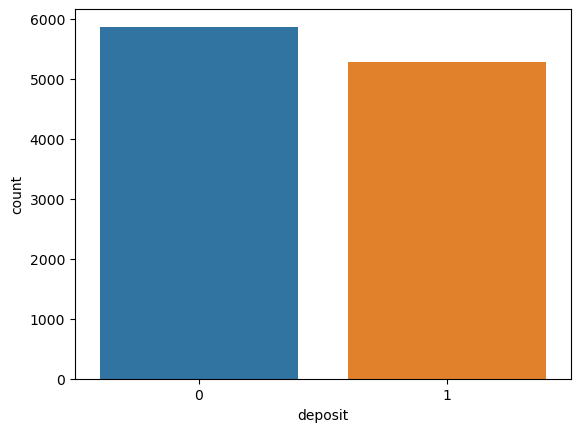

In [43]:
# count plot for deposit
print(bank["deposit"].value_counts())
#the dataset is fairly balanced
sns.countplot(data=bank,x=bank['deposit'])

the target column "deposit" is categorical column with 2 options: "yes">> 5289 ,"no">> 5873

<Axes: xlabel='poutcome'>

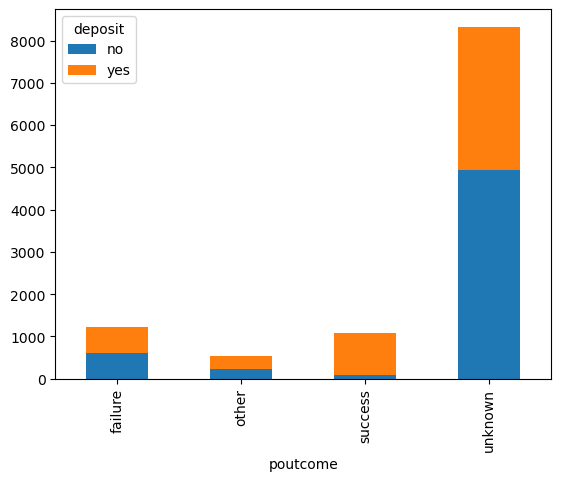

In [15]:
# bar chart for poutcome
types = bank.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

poutcome : The outcome of previous marketing campaign. It’s a categorical feature. Many of them were not contacted in previous campaign.

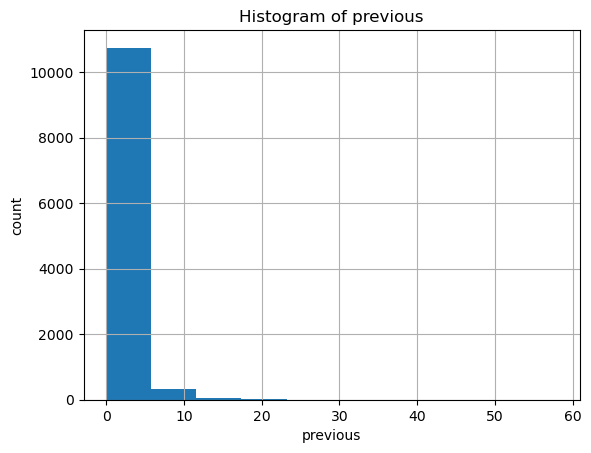

In [18]:
#histogram of previous
bank['previous'].hist()
plt.title('Histogram of previous')
plt.ylabel('count')
plt.xlabel('previous');
plt.show()

Previous : Number of times this client was contacted before this campaign.

<Axes: xlabel='month'>

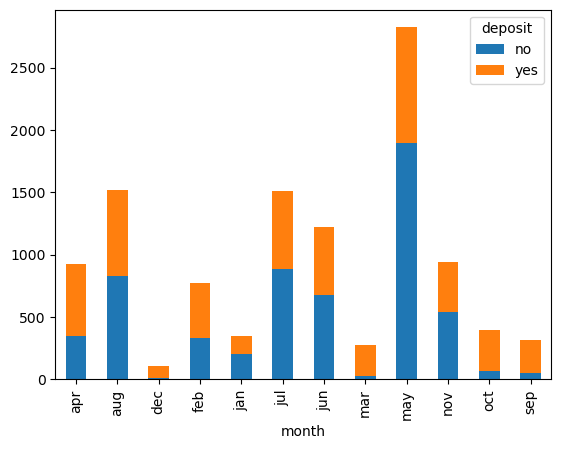

In [19]:
#bar chart for month
types = bank.groupby("month")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Month : the month in which the client was contacted. Maximum clients were contacted in May.

<Axes: xlabel='day'>

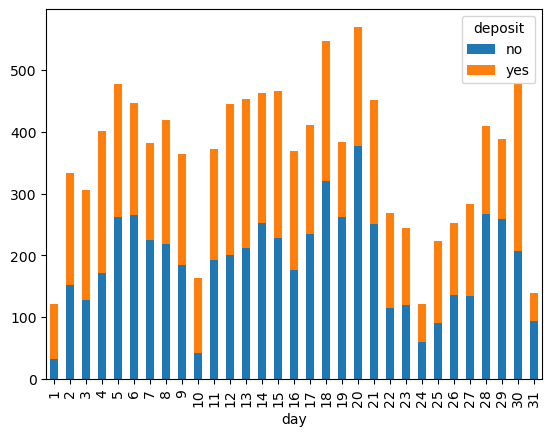

In [20]:
# group by days to display bar chart
types = bank.groupby("day")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Day : which day of the month was the client contacted. More clients were contacted in the middle of the month.

<Axes: xlabel='contact'>

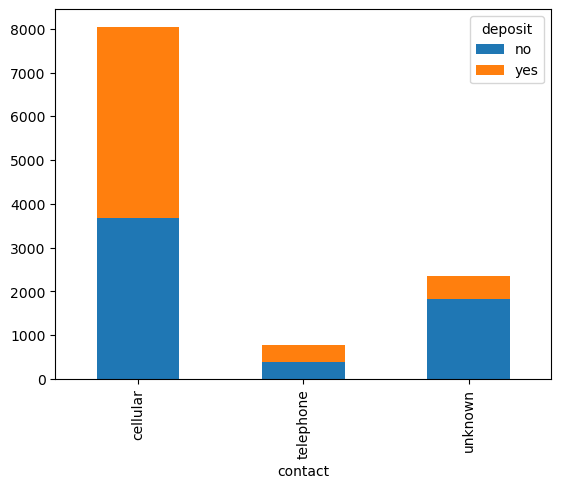

In [21]:
# group by contact to display bar chart
types = bank.groupby("contact")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Contact : This feature specifies the way of communication. Most of the communication made by cellular

<Axes: xlabel='loan'>

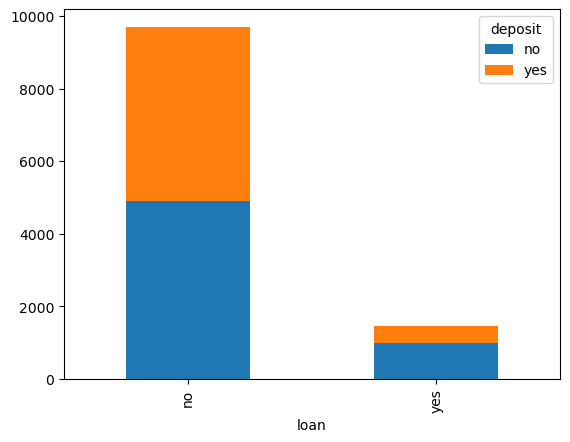

In [23]:
# group by loan to display bar chart
types = bank.groupby("loan")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Loan : Most of them don’t already have personal loan in bank.

<Axes: xlabel='marital'>

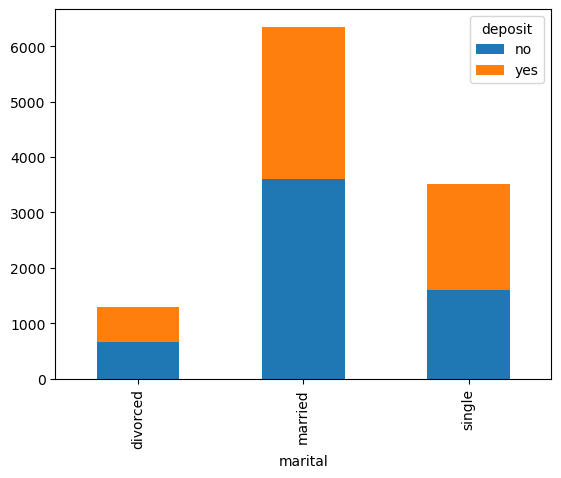

In [24]:
# group by marital to display bar chart
types = bank.groupby("marital")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Marital : This is a categorical feature. It has 3 categories. Married clients constitute the largest portion of this feature.

<Axes: xlabel='job'>

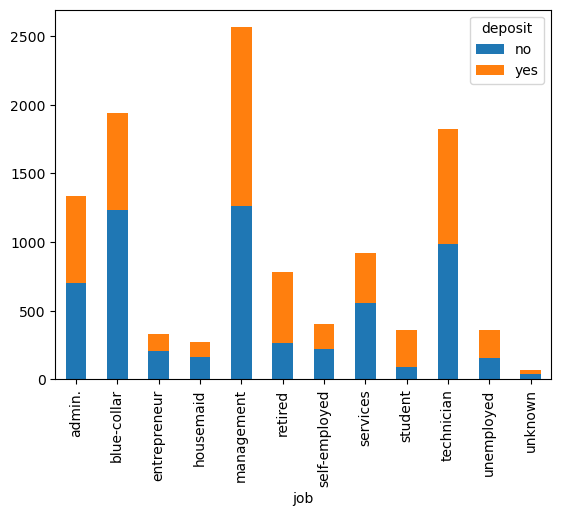

In [25]:
# group by job to display bar chart
types = bank.groupby("job")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Job : This is a categorical feature. It has 12 categories including unknown. The largest clients in this category belong to management jobs while unknown category has least count.

<Axes: xlabel='education'>

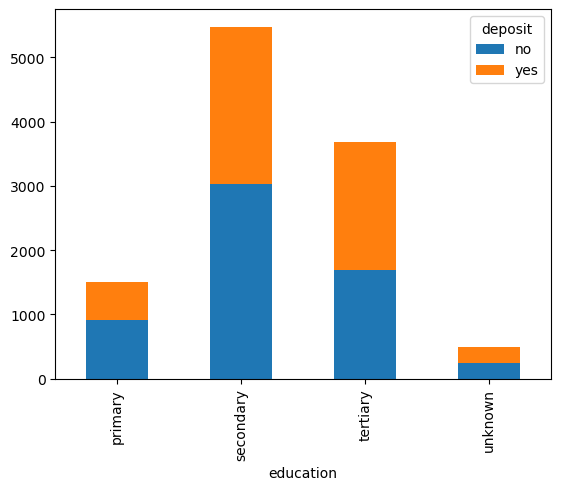

In [26]:
# group by education to display bar chart
types = bank.groupby("education")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Education : Maximum clients belong to category of secondary education. The category tertiary education has larger ratio of clients saying yes to term deposit than any other category.

# Encode categorical coulmns 

In [52]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','deposit']

label_encoder = LabelEncoder()
for i in categorical_cols:
    bank[i]=label_encoder.fit_transform(bank[i])
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


# Scale the Data

In [51]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(bank.drop('deposit',axis=1))
bank_feat=pd.DataFrame(scaled_features,columns=bank.columns[:-1])
bank_feat.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.491505,-1.391604,-0.318672,-0.380501,-0.123617,0.252525,1.055280,-0.387923,1.844786,-1.265746,0.800268,1.930226,-0.554168,-0.481184,-0.36326,0.520705
1,1.239676,-1.391604,-0.318672,-0.380501,-0.123617,-0.459974,-0.947616,-0.387923,1.844786,-1.265746,0.800268,3.154612,-0.554168,-0.481184,-0.36326,0.520705
2,-0.019470,1.399105,-0.318672,-0.380501,-0.123617,-0.080160,1.055280,-0.387923,1.844786,-1.265746,0.800268,2.929901,-0.554168,-0.481184,-0.36326,0.520705
3,1.155733,0.778947,-0.318672,-0.380501,-0.123617,0.293762,1.055280,-0.387923,1.844786,-1.265746,0.800268,0.596366,-0.554168,-0.481184,-0.36326,0.520705
4,1.071790,-1.391604,-0.318672,0.953822,-0.123617,-0.416876,-0.947616,-0.387923,1.844786,-1.265746,0.800268,0.867171,-0.186785,-0.481184,-0.36326,0.520705
